# `pandas`

Now that we've discussed Scientific Computing generally and introduced `NumPy`, we're ready to learn the basics of `pandas`, the most popular python package for working with data. Similar to what we saw with `NumPy`, we'll first introduce the core object at the heart of `pandas` -- the DataFrame. From there, we'll introduce some of the attributes and most common methods for working with `DataFrame`s. And, we'll finish discussing additional functions within `pandas` that make working with data more straightforward.

As with `NumPy`, you'll need to first `import` `pandas`. Convention is to import: `import padas as pd`, so we'll encourage that here. Using this import statement, any time you want to reference `pandas` functionality, you can do so with just the two letters `pd`.

<div class="alert alert-info">
Be sure to import <code>pandas</code> using <code>import pandas as pd</code> before attempting to run any of the included code in this section.
</div>

In [1]:
import pandas as pd

In [1]:
%%HTML
<iframe id="kaltura_player" type="text/javascript"  src='https://cdnapisec.kaltura.com/p/2323111/embedPlaykitJs/uiconf_id/52706832?iframeembed=true&entry_id=1_ue8rmqk0&config[provider]={"widgetId":"1_anbdt98w"}'  style="width: 800px;height: 450px;border: 0;" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" title="Kaltura Player"></iframe>

## Heterogeneous Data

While `NumPy` arrays make working with homogenous data (data that are all of one type, typically numbers), `pandas` adds functionality for working with heterogeneous data. What if you have information about individual's heights (floats) but also the color of their eyes (strings)? This would be an example of heterogeneous data and is precisely what `pandas` is designed to handle.

More specifically, a `DataFrame` can store multiple types of data; however, each individual column will store a single type of data. 

## `pandas DataFrame`

Enter, the `DataFrame` - the central object within `pandas`. `DataFrame`s are a 2-dimensional data structure that store data in a table/array, but that enable continous (numeric) and categorical (discrete and text-based) data to be stored in a single object. `DataFrame`s enable information to be stored in rows and columns (like an array); however, columns can be of mixed type and both rows and columns can have labels. If you're envisioning data stored in a spreadsheet-like object, you've got the right idea. For example, a `DataFrame` could be used to store the following information: 

<table>
    <tr>
        <th>Participant ID</th>
        <th>Height (cm)</th>
        <th>Eye Color</th>
    </tr>
    <tr>
        <td >01</td>
        <td>170</td>
        <td>Blue</td>
    </tr>
    <tr>
        <td>02</td>
        <td>165</td>
        <td>Green</td>
    </tr>
    <tr>
        <td>03</td>
        <td>180</td>
        <td>Brown</td>
    </tr>
    <tr>
        <td>04</td>
        <td>175</td>
        <td>Hazel</td>
    </tr>
    <tr>
        <td>05</td>
        <td>160</td>
        <td>Brown</td>
    </tr>
</table>

In fact, we can store that very information in a pandas DataFrame using `pd.DataFrame` and passing in the data:

In [2]:
df = pd.DataFrame({'Participant ID': ['01', '02', '03', '04', '05'],
                   'Height (cm)': [170, 165, 180, 175, 160],
                   'Eye Color': ['Blue', 'Green', 'Brown', 'Hazel', 'Brown']
                  })
df

,Participant ID,Height (cm),Eye Color
0,01,170,Blue
1,02,165,Green
2,03,180,Brown
3,04,175,Hazel
4,05,160,Brown


We'll note a few things about this `df` object:
1. We've called the object `df`. This is a convention you'll often see when people are working with `DataFrame`s with `df` being short for `df`. We'll use this convention frequently, but you could give your `DataFrame`s more informative names (i.e. `df_participants`).
2. In `df` you'll notice that there are three column names at top.
3. You'll also notice there are indices off to the left for each row. By default, `pandas` will assign each row an index starting with zero. 

## Attributes

As with arrays, when working with `DataFrame` objects, it's often helpful to be able to access information about the `DataFrame` by accessing attributes. 

### `shape`
To get the dimensions of the `DataFrame`, the attribute is the same as in `Numpy`: `shape`

In [3]:
df.shape

(5, 3)

Again, similar to arrays, the output specifies the number of rows first (5) and the number of columns second (3).

### `columns` & `index`

If you ever need to access the names of the columns in a `DataFrame` it can be helpful to know that the column names can be extracted from the `columns` attribute:

In [4]:
df.columns

Index(['Participant ID', 'Height (cm)', 'Eye Color'], dtype='object')

The same goes for extracting the indices (row names). This can be accessed through `index`:

In [5]:
df.index

RangeIndex(start=0, stop=5, step=1)

### `dtypes`

`dtypes` can also be helpful to determine *how* the `DataFrame` is storing your data. This is particularly important in `pandas` due to the fact that DataFrames can store heterogenous data...and `pandas` makes its best guess as to the information stored in the `DataFrame`. This process is not perfect. If you're working with a very large dataset and you expect all of the values in a given column to be numbers, you may *assume* that the column stores numbers. However, what if one of the values in your large dataset was actually the word "nine feet"? In that case, `pandas` would convert everything to strings in that column as it doesn't know how to handle "nine feet" as a number (even if we humans may!). This is why it's good practice to just double check that each of your columns is of the expected type using the `dtypes` attribute:

In [6]:
df.dtypes

Participant ID    object
Height (cm)        int64
Eye Color         object
dtype: object

In the above, you may have assumed that Participant ID would be an integer; however, despite appearing as numbers these IDs were entered as strings, making them `object` type variables.

### head

Also note that `head` returns the first five rows of a `DataFrame`. This can be helpful when working with larger `DataFrame`s just to get a sene of the data. 

Note that there is both a `head` *attribute*:

In [7]:
df.head

<bound method NDFrame.head of   Participant ID  Height (cm) Eye Color
0             01          170      Blue
1             02          165     Green
2             03          180     Brown
3             04          175     Hazel
4             05          160     Brown>

...and a `head()` *method*:

In [8]:
df.head()

,Participant ID,Height (cm),Eye Color
0,01,170,Blue
1,02,165,Green
2,03,180,Brown
3,04,175,Hazel
4,05,160,Brown


The difference is in how the data are displayed, with the method displaying the data in a slightly more reader-friendly fasion.

## Indexing & Slicing

So far we've introduced the `DataFrame` as a way to store heterogenous data in rows and columns. But, I haven't mentioned exactly how `pandas` accomplishes that. While the `DataFrame` is the core object, it's also important to be aware that `DataFrame`s are comprised of **`Series`**, which are a 1-dimensional labeled array storing data. Each column in `pandas` is a `Series` object and can be accessed using the column name and indexing. For example, if we wanted to extract the `'Height'` column from our `df` we could do so using: 

In [9]:
df['Height (cm)']

0    170
1    165
2    180
3    175
4    160
Name: Height (cm), dtype: int64

In the above, we can see that indexing into a `DataFrame` by specifying the column name, `pandas` will return all values in that column, along with their corresponding indices. It also reports the type of the variable and the name of the column.

Specifically, the way `pandas` stores each column is as a `pd.Series` type object. We can see this explicitly by checking the `type` of the above output:

In [10]:
type(df['Height (cm)'])

pandas.core.series.Series

Thus, conceptually, every `DataFrame` is comprised of `Series` of the same length stacked next to one another.

We're also able to access information stored in rows; however, the syntax has to differ a little bit. `df[0]` will not work here, as `pandas` would be looking for a *column* with the label `0`. Rather, when we want to access data in a row, we have to return to our familiar slicing syntax, first specifing the row(s) we want to return using `start:stop` notation.

For example, `df[:1]` will return from the beginning of the `DataFrame` up to but not including the row with the index `1` (using our familiar slicing approach):

In [11]:
df[:1]

,Participant ID,Height (cm),Eye Color
0,01,170,Blue


However, we will highlight here that what is being returned here is a `DataFrame` (a slice of the original) and not a `Series`:

In [12]:
type(df[:1])

pandas.core.frame.DataFrame

`pd.Series` objects are specifically for data for a single variable in a *column*...and not for returning subsets of a larger `DataFrame` across columns. If multiple columns are involved, then it's a `DataFrame` object.

If you wanted to extract the information as a series, you would need to use `loc`...

### `.loc`

But, what if you want to combine these two ideas? What if you want to specify a few rows and a few columns? This is where `loc` comes in. `loc` (standing for loccation) allows users to control which part of the `DataFrame` they want to return.

For example, if we wanted the second and third rows and only the `Eye Color` column from `df` we could use the following:

In [13]:
df.loc[1:2, 'Eye Color']

1    Green
2    Brown
Name: Eye Color, dtype: object

In the above syntax, notice that the convention of `[row, column]` is still followed. However, the `start:stop` for `loc` *is* inclusive of the `stop` value (unlike everywhere else in `Python`). Thus, to return the second and third rows, you specify that you want to start at index `1` and stop at (*and include*) index `2`. 

Returning to our goal of extracting the data in the first row from above, if we wanted to extract just the values in a given rows as a `Series`, we could use `loc` to do so, first specifiying the index and then to extract all columns:

In [14]:
df.loc[0,:]

Participant ID      01
Height (cm)        170
Eye Color         Blue
Name: 0, dtype: object

Finally, putting all of this together, `loc` can also be used to extract singular values, by specifying a single location within the `DataFrame`:

In [15]:
df.loc[0, 'Eye Color']

'Blue'

Note that the above returns a value of the type of data directly, and not a `DataFrame` or `Series`. Thus, 'Blue' here is a string.

## Methods

There are [*many, many* methods](https://pandas.pydata.org/docs/reference/frame.html) available for `DataFrame` objects. This section will only cover a few of the most commonly used, but will give you a sense of the *types* of things one can do with a `DataFrame`.

### `describe()`

One powerful method is the `describe()` method, which will calculate and provide a number of descriptive statistics for all numeric variables in your dataset. In `df`, we have a single numeric varaible (`Height (cm)`), which is summarized below:

In [16]:
df.describe()

,Height (cm)
count,5.000000
mean,170.000000
std,7.905694
min,160.000000
25%,165.000000
50%,170.000000
75%,175.000000
max,180.000000


### `replace()`

Of course, `DataFrame`s are mutable, with the ability to change or update values after creation, using `replace`:

For example, what if I realized that the participant IDs should be zero padded with *two* zeroes instead of one. To accomplish this, we can use the `replace` method to change each `'0'` into `'00'`:

In [17]:
df['Participant ID'] = df['Participant ID'].replace('0', '00', regex=True)

df

,Participant ID,Height (cm),Eye Color
0,001,170,Blue
1,002,165,Green
2,003,180,Brown
3,004,175,Hazel
4,005,160,Brown


Notice in the syntax above a few things: 
1. The `replace` method is operating on the `Series` `'Partcipant ID'`. Thus, when we assign the new values, they are assigned back to that specific series. The rest of `df` remains unchanged.
2. In `replace` the first argument is what is to be replaced, the second is what to replace it with. `regex=True` specifies to use regular expression to evaluate the change (rather than string literals). Without `regex=True`, `replace` would only change a cell with the exact value '0' to '00'...instead of changing every case where it finds a zero.

We'll also note that it *is* possible to directly assign a new value to a given location within a `DataFrame` directly using indexing/slicing and assignment:

In [18]:
df.loc[0, 'Height (cm)'] = 173

df

,Participant ID,Height (cm),Eye Color
0,001,173,Blue
1,002,165,Green
2,003,180,Brown
3,004,175,Hazel
4,005,160,Brown


### `astype()`

We mentioned `dtypes` is helpful for knowing what your value type is. But, what if you *want* to change it to another type. `astype()` allows you to typecast (meaning specify the type) for a variable. If we wanted `'Height (cm)'` to be a float instead of an integer, for example, we could accomplish that using `astype`:

In [19]:
df['Height (cm)'] = df['Height (cm)'].astype(float)

df

,Participant ID,Height (cm),Eye Color
0,001,173.0,Blue
1,002,165.0,Green
2,003,180.0,Brown
3,004,175.0,Hazel
4,005,160.0,Brown


Now instead of integers, the heights are floats.

We'll note here that there are additional methods that help with typecasting, and we'll mention two here: 
1.  `convert_dtypes` | will convert columns to the best possible `dtypes`
2.  `to_numpy` | will convert a `DataFrame` to a `NumPy` array

### `value_counts()`

Often when working with data (particularly categorical data), we're interest in how many different values there are. For example, how many different eye colors are in our dataset? And how many individuals are there with each eye color? While we can easily determine this for our limited dataset here, as datasets grow in size, it's less easy to determine at a glance. Instead, we can use `value_counts` to answer this question:

In [20]:
df['Eye Color'].value_counts()

Eye Color
Brown    2
Blue     1
Green    1
Hazel    1
Name: count, dtype: int64

In the above output, each unique eye color is at left and the corresponding number of how many times each shows up is at right. Eye colors are sorted by frequency of appearance, with most frequent first. For categories with ties, labels are sorted alphanumerically. 

### `unique` & `nunique`

Similarly, if you don't want *all* of the information above, but want pieces of information about uniqueness, there are additional helpful methods. 

For example `unique` returns all the unique values (as an array):

In [21]:
df['Eye Color'].unique()

array(['Blue', 'Green', 'Brown', 'Hazel'], dtype=object)

...and `nunique()` returns how many unique values there are (in our case, 4):

In [22]:
df['Eye Color'].nunique()

4

### Method Chaining

Building on the above, one key important features within `pandas` is the ability to chain methods together using the general syntax `df.method1().method2()`. In this, `method1` would be applied to `df` *and then* `method2()` would be appled to the output of `method1()`.

For example, what if you didn't want the unique eye colors as an array...but rather as a list. You can do that with method chaining:

In [23]:
df['Eye Color'].unique().tolist()

['Blue', 'Green', 'Brown', 'Hazel']

...and what if you didn't want *all* of the `value_counts` output...but just the category that shows up the most? You can use `value_counts()` chained with `max()`, the output of which lets you know of all the eye colors, the one that shows up the most shows up twice:

In [24]:
df['Eye Color'].value_counts().max()

2

...but what if you didn't want to know how many times the most common eye color showed up, but just what that eye color that showed up the most was. There's `idxmax()` for that, which can be chained with `value_counts()`:

In [25]:
df['Eye Color'].value_counts().idxmax()

'Brown'

Note that method chaining is *not* limited to two methods. Many methods can be chained together the output of each subsequent method becoming the input for the next. The reason this is possible is because most `pandas` methods return a `DataFrame`...enabling the next method to operate on that returned DataFrame. 

While we won't walk through examples of all of the existing methods in `pandas`, we'll summarize a few additional common ones here:

| Function          | Purpose                                                    |
|-------------------|------------------------------------------------------------|
| `fillna()`        | Fill in missing data                                       |
| `groupby()`       | Group data by a variable prior to carrying out some operation within group |
| `concat   ()`     | Combine (concatenate) `Series`/`DataFrame`s together       |
| `merge()`         | Enable SQL-like joins across `DataFrame`s                  |
| `assign()`        | Create new columns                                         |
| `query()`         | Filter rows using Boolean logic                            |
| `isin()`          | Returns rows with match                                    |

Additional methods are summarized in the [`pandas` Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

## Functions

While the `DataFrame` and `Series` objects are at the center of the `pandas` package, there are additional functions within `pandas` that support working with data in Python.

### `read_*`

In this chapter so far, we've worked with data that we generated directly and stored in a `DataFrame`. However, typically data live elsewhere and individuals want to read it into python for data analysis. This is where the suite of `read_*` functions come into play. There are a number of them, the most common of which is likely `read_csv()`, which reads data from CSV (comma-separated value files) into python. Files read in can be either filepaths or URLs.

For example, the following reads in data from a CSV stored on GitHub (passing in the URL of the file as a string:

In [26]:
df_msleep = pd.read_csv('https://raw.githubusercontent.com/ShanEllis/datasets/master/msleep.csv')

In [27]:
df_msleep

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
...,...,...,...,...,...,...,...,...,...,...,...
78,Tree shrew,Tupaia,omni,Scandentia,NaN,8.9,2.6,0.233333,15.1,0.00250,0.104
79,Bottle-nosed dolphin,Tursiops,carni,Cetacea,NaN,5.2,NaN,NaN,18.8,NaN,173.330
80,Genet,Genetta,carni,Carnivora,NaN,6.3,1.3,NaN,17.7,0.01750,2.000
81,Arctic fox,Vulpes,carni,Carnivora,NaN,12.5,NaN,NaN,11.5,0.04450,3.380


In addition to reading in CSV files, there are `pd.read_*` functions for reading in JSON, XML, HTML, and excel datasets (among others).

Similarly there are corresponding `to_*` methods that allow for `DataFrames` to be written out to files of various types (i.e. CSV, JSON, etc.)

### Plotting

While there are many ways to generate plots in python, `pandas` does have the ability to generate plots via the `plotting` module in `pandas`:

<Axes: title={'center': 'sleep_total'}, xlabel='vore'>

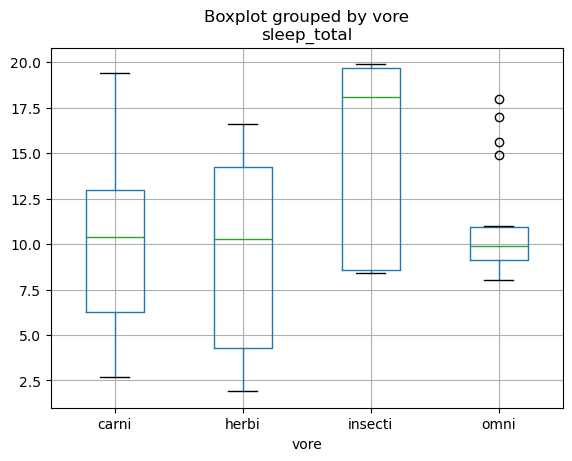

In [28]:
pd.plotting.boxplot(df_msleep, column='sleep_total', by='vore')

While we won't be discussing the full capabilities here (partially because it's beyond the scope and partially because many people use other approaches for plotting in python), we did at least want to introduce this as a general capability within `pandas`.

## Exercises

Q1. **Comparing them to standard library Python types, which is the best mapping for `NumPy` arrays and `pandas` `DataFrames`?**

A) DataFrames are like lists, arrays are like tuples  
B) DataFrames and arrays are like lists  
C) DataFrames are like tuples, arrays are like lists  
D) DataFrames and arrays are like dictionaries  
E) Dataframes are like dictionaries, arrays are like lists  

Q2. **If a `DataFrame` contained only numeric values, how would it differ from a `NumPy` array?**

A) The `DataFrame` would additionally have indices and column names  
B) They would be exactly the same   
C) `DataFrame`s cannot store homogenous data  
D) The `DataFrame` would convert all of the numeric values to strings  
E) `NumPy` arrays cannot store numeric values  

Q3. **Read in the `df_msleep` DataFrame provided above. Use `pandas` attributes to determine the dimensions and types of information stored in `df_msleep`**

Q4. **Again using `df_msleep`, use a `pandas` method to determine the average amount of total sleep the animals in this dataset get.**

Q5. **Again using `df_msleep`, use a `pandas` method to determine which `'vore'` is most common in this dataset, as well as how many animals there are of that `'vore'`.**